# Heart Disease Data Set

https://archive.ics.uci.edu/ml/datasets/Heart+Disease


### Description

- **age**: The person's age in years
- **sex**: The person's sex (1 = male, 0 = female)
- **cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- **trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol:** The person's cholesterol measurement in mg/dl
- **fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) 
- **restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach:** The person's maximum heart rate achieved
- **exang:** Exercise induced angina (1 = yes; 0 = no)
- **oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more [here](https://litfl.com/st-segment-ecg-library/))
- **slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca:** The number of major vessels (0-3)
- **thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target:** Heart disease (0 = no, 1 = yes)

### Heart Disease Classification 

Perform exploratory data analysis on the data. Then, train and validate different ML classifiers.

In [1]:
import pandas as pd
df = pd.read_csv("./data/heart.csv")
df.shape

(303, 14)

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


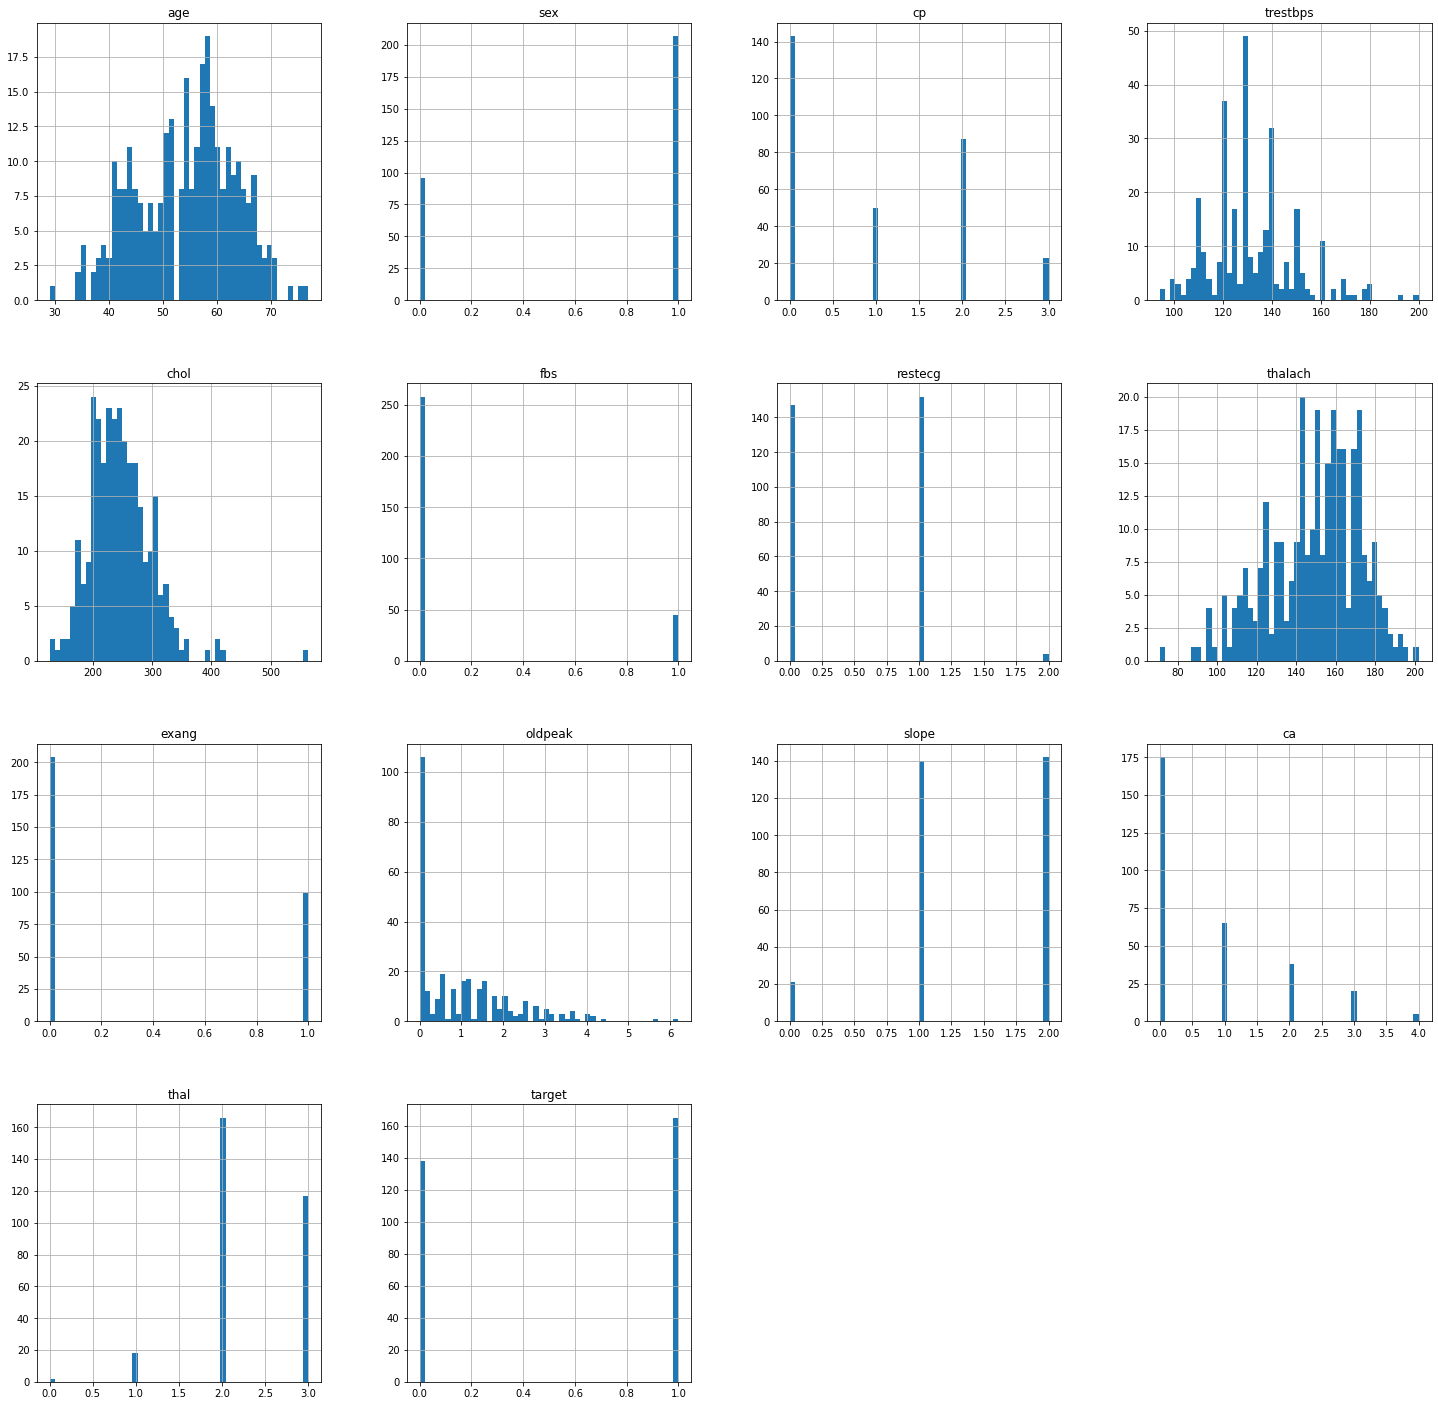

In [3]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(25,25))
plt.show()

In [4]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [5]:
train_set, test_set = split_train_test(df, 0.2)
len(df)

303

In [6]:
len(train_set)

243

In [7]:
len(test_set)

60

In [8]:
corr_matrix = df.corr()
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

array([[<AxesSubplot:xlabel='cp', ylabel='cp'>,
        <AxesSubplot:xlabel='slope', ylabel='cp'>,
        <AxesSubplot:xlabel='thalach', ylabel='cp'>,
        <AxesSubplot:xlabel='restecg', ylabel='cp'>,
        <AxesSubplot:xlabel='target', ylabel='cp'>],
       [<AxesSubplot:xlabel='cp', ylabel='slope'>,
        <AxesSubplot:xlabel='slope', ylabel='slope'>,
        <AxesSubplot:xlabel='thalach', ylabel='slope'>,
        <AxesSubplot:xlabel='restecg', ylabel='slope'>,
        <AxesSubplot:xlabel='target', ylabel='slope'>],
       [<AxesSubplot:xlabel='cp', ylabel='thalach'>,
        <AxesSubplot:xlabel='slope', ylabel='thalach'>,
        <AxesSubplot:xlabel='thalach', ylabel='thalach'>,
        <AxesSubplot:xlabel='restecg', ylabel='thalach'>,
        <AxesSubplot:xlabel='target', ylabel='thalach'>],
       [<AxesSubplot:xlabel='cp', ylabel='restecg'>,
        <AxesSubplot:xlabel='slope', ylabel='restecg'>,
        <AxesSubplot:xlabel='thalach', ylabel='restecg'>,
        <AxesSubplo

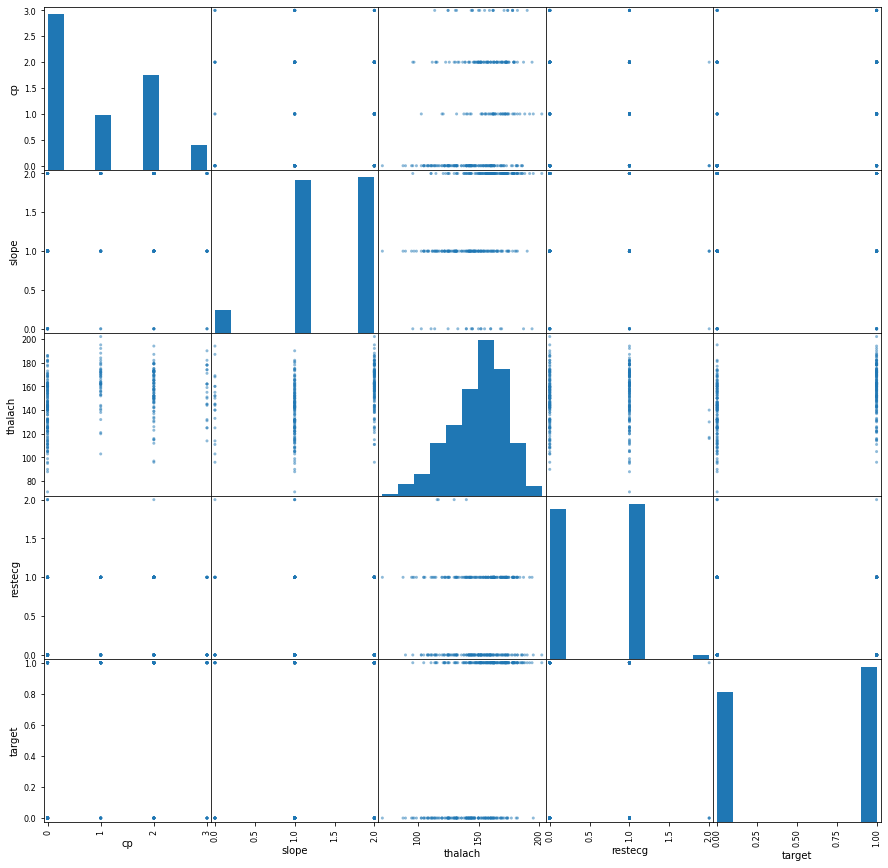

In [9]:
from pandas.plotting import scatter_matrix
attributes = ["cp", "slope", "thalach", "restecg", "target"]
scatter_matrix(df[attributes], figsize = (15, 15))

In [10]:
from sklearn.preprocessing import OneHotEncoder
cp_cat = df[["cp"]]
cp_encoded = OneHotEncoder()
cp_cat_encoded = cp_encoded.fit_transform(cp_cat)
cp_types = ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"]
df_cp=pd.DataFrame(cp_cat_encoded.toarray(),columns=cp_types)


In [11]:
df2 = pd.concat([df,df_cp], axis=1)
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,typical angina,atypical angina,non-anginal pain,asymptomatic
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0.0,0.0,0.0,1.0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0.0,0.0,1.0,0.0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0.0,1.0,0.0,0.0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0.0,1.0,0.0,0.0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1.0,0.0,0.0,0.0


In [12]:
from sklearn.preprocessing import OneHotEncoder
sex_cat = df[["sex"]]
sex_encoded = OneHotEncoder()
sex_cat_encoded = sex_encoded.fit_transform(sex_cat)
sex_types = ["female", "male"]
df_sex=pd.DataFrame(sex_cat_encoded.toarray(), columns=sex_types)


In [13]:
df3 = pd.concat([df2,df_sex], axis=1)
df3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,typical angina,atypical angina,non-anginal pain,asymptomatic,female,male
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0.0,0.0,0.0,1.0,0.0,1.0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0.0,0.0,1.0,0.0,0.0,1.0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0.0,1.0,0.0,0.0,1.0,0.0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0.0,1.0,0.0,0.0,0.0,1.0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1.0,0.0,0.0,0.0,1.0,0.0


In [14]:
from sklearn.preprocessing import OneHotEncoder
restecg_cat = df[["restecg"]]
restecg_encoded = OneHotEncoder()
restecg_cat_encoded = restecg_encoded.fit_transform(restecg_cat)
restecg_types = ["normal", "ST-T wave abnormality", "showing probable or LVH"]
df_restecg=pd.DataFrame(restecg_cat_encoded.toarray(), columns=restecg_types)


In [15]:
df4 = pd.concat([df3,df_restecg], axis=1)
df4.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,target,typical angina,atypical angina,non-anginal pain,asymptomatic,female,male,normal,ST-T wave abnormality,showing probable or LVH
0,63,1,3,145,233,1,0,150,0,2.3,...,1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,37,1,2,130,250,0,1,187,0,3.5,...,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,57,0,0,120,354,0,1,163,1,0.6,...,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [16]:
from sklearn.preprocessing import OneHotEncoder
slope_cat = df[["slope"]]
slope_encoded = OneHotEncoder()
slope_cat_encoded = slope_encoded.fit_transform(slope_cat)
slope_types = ["upsloping", "flat", "downsloping"]
df_slope=pd.DataFrame(slope_cat_encoded.toarray(), columns=slope_types)


In [17]:
df5 = pd.concat([df4,df_slope], axis=1)
df5.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,non-anginal pain,asymptomatic,female,male,normal,ST-T wave abnormality,showing probable or LVH,upsloping,flat,downsloping
0,63,1,3,145,233,1,0,150,0,2.3,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,37,1,2,130,250,0,1,187,0,3.5,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,41,0,1,130,204,0,0,172,0,1.4,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,56,1,1,120,236,0,1,178,0,0.8,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,57,0,0,120,354,0,1,163,1,0.6,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [18]:
from sklearn.preprocessing import OneHotEncoder
thal_cat = df[["thal"]]
thal_cat
thal_encoded = OneHotEncoder()
thal_cat_encoded = thal_encoded.fit_transform(thal_cat)
thal_types = ["0", "thal_normal", "fixed defect", "reversable defect"]
df_thal=pd.DataFrame(thal_cat_encoded.toarray(), columns=thal_types)


In [19]:
df6 = pd.concat([df5,df_thal], axis=1)
df6

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,normal,ST-T wave abnormality,showing probable or LVH,upsloping,flat,downsloping,0,thal_normal,fixed defect,reversable defect
0,63,1,3,145,233,1,0,150,0,2.3,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,37,1,2,130,250,0,1,187,0,3.5,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,41,0,1,130,204,0,0,172,0,1.4,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,56,1,1,120,236,0,1,178,0,0.8,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,57,0,0,120,354,0,1,163,1,0.6,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
299,45,1,3,110,264,0,1,132,0,1.2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
300,68,1,0,144,193,1,1,141,0,3.4,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
301,57,1,0,130,131,0,1,115,1,1.2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [20]:
clean_df = df6[["age", "female", "male", "typical angina", "atypical angina", "non-anginal pain", "asymptomatic", "trestbps", "chol", "fbs", "normal", "ST-T wave abnormality", "showing probable or LVH", "thalach", "exang", "oldpeak", "upsloping", "flat", "downsloping", "ca", "thal_normal", "fixed defect", "reversable defect", "target"]]
clean_df.head()
clean_df

,age,female,male,typical angina,atypical angina,non-anginal pain,asymptomatic,trestbps,chol,fbs,...,exang,oldpeak,upsloping,flat,downsloping,ca,thal_normal,fixed defect,reversable defect,target
0,63,0.0,1.0,0.0,0.0,0.0,1.0,145,233,1,...,0,2.3,1.0,0.0,0.0,0,1.0,0.0,0.0,1
1,37,0.0,1.0,0.0,0.0,1.0,0.0,130,250,0,...,0,3.5,1.0,0.0,0.0,0,0.0,1.0,0.0,1
2,41,1.0,0.0,0.0,1.0,0.0,0.0,130,204,0,...,0,1.4,0.0,0.0,1.0,0,0.0,1.0,0.0,1
3,56,0.0,1.0,0.0,1.0,0.0,0.0,120,236,0,...,0,0.8,0.0,0.0,1.0,0,0.0,1.0,0.0,1
4,57,1.0,0.0,1.0,0.0,0.0,0.0,120,354,0,...,1,0.6,0.0,0.0,1.0,0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,1.0,0.0,1.0,0.0,0.0,0.0,140,241,0,...,1,0.2,0.0,1.0,0.0,0,0.0,0.0,1.0,0
299,45,0.0,1.0,0.0,0.0,0.0,1.0,110,264,0,...,0,1.2,0.0,1.0,0.0,0,0.0,0.0,1.0,0
300,68,0.0,1.0,1.0,0.0,0.0,0.0,144,193,1,...,0,3.4,0.0,1.0,0.0,2,0.0,0.0,1.0,0
301,57,0.0,1.0,1.0,0.0,0.0,0.0,130,131,0,...,1,1.2,0.0,1.0,0.0,1,0.0,0.0,1.0,0


In [21]:
train_set, test_set = split_train_test(clean_df, 0.2)
clean_df.shape

(303, 24)

In [22]:
train_set.shape

(243, 24)

In [23]:
test_set.shape

(60, 24)

In [24]:
x = train_set.iloc[:,:23]
y = train_set.iloc[:,23]
print(x)
print(y)

     age  female  male  typical angina  atypical angina  non-anginal pain  \
63    41     0.0   1.0             0.0              1.0               0.0   
182   61     1.0   0.0             1.0              0.0               0.0   
137   62     0.0   1.0             0.0              1.0               0.0   
178   43     0.0   1.0             1.0              0.0               0.0   
215   43     1.0   0.0             1.0              0.0               0.0   
..   ...     ...   ...             ...              ...               ...   
106   69     0.0   1.0             0.0              0.0               0.0   
187   54     0.0   1.0             1.0              0.0               0.0   
61    54     0.0   1.0             0.0              1.0               0.0   
54    63     1.0   0.0             0.0              0.0               1.0   
38    65     1.0   0.0             0.0              0.0               1.0   

     asymptomatic  trestbps  chol  fbs  ...  thalach  exang  oldpeak  \
63 

In [25]:
X = test_set.iloc[:,:23]
Y = test_set.iloc[:,23]
X.head()

,age,female,male,typical angina,atypical angina,non-anginal pain,asymptomatic,trestbps,chol,fbs,...,thalach,exang,oldpeak,upsloping,flat,downsloping,ca,thal_normal,fixed defect,reversable defect
121,59,0.0,1.0,1.0,0.0,0.0,0.0,138,271,0,...,182,0,0.0,0.0,0.0,1.0,0,0.0,1.0,0.0
269,56,0.0,1.0,1.0,0.0,0.0,0.0,130,283,1,...,103,1,1.6,1.0,0.0,0.0,0,0.0,0.0,1.0
144,76,1.0,0.0,0.0,0.0,1.0,0.0,140,197,0,...,116,0,1.1,0.0,1.0,0.0,0,0.0,1.0,0.0
174,60,0.0,1.0,1.0,0.0,0.0,0.0,130,206,0,...,132,1,2.4,0.0,1.0,0.0,2,0.0,0.0,1.0
243,57,0.0,1.0,1.0,0.0,0.0,0.0,152,274,0,...,88,1,1.2,0.0,1.0,0.0,1,0.0,0.0,1.0


In [26]:
Y.head()

121    1
269    0
144    1
174    0
243    0
Name: target, dtype: int64

In [27]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())
    

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(x,y)
tree.predict(X)
test_set["predicted"] = tree.predict(X)
test_set.head()

<ipython-input-28-477d3ef872e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["predicted"] = tree.predict(X)


,age,female,male,typical angina,atypical angina,non-anginal pain,asymptomatic,trestbps,chol,fbs,...,oldpeak,upsloping,flat,downsloping,ca,thal_normal,fixed defect,reversable defect,target,predicted
121,59,0.0,1.0,1.0,0.0,0.0,0.0,138,271,0,...,0.0,0.0,0.0,1.0,0,0.0,1.0,0.0,1,0
269,56,0.0,1.0,1.0,0.0,0.0,0.0,130,283,1,...,1.6,1.0,0.0,0.0,0,0.0,0.0,1.0,0,0
144,76,1.0,0.0,0.0,0.0,1.0,0.0,140,197,0,...,1.1,0.0,1.0,0.0,0,0.0,1.0,0.0,1,1
174,60,0.0,1.0,1.0,0.0,0.0,0.0,130,206,0,...,2.4,0.0,1.0,0.0,2,0.0,0.0,1.0,0,0
243,57,0.0,1.0,1.0,0.0,0.0,0.0,152,274,0,...,1.2,0.0,1.0,0.0,1,0.0,0.0,1.0,0,0


In [29]:
df_test = pd.DataFrame(test_set)
df_test.sort_index(inplace=True)

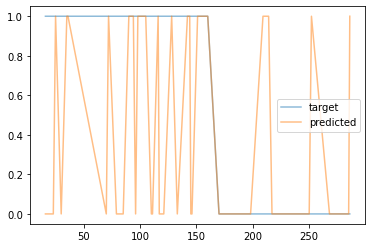

In [30]:
df_test[["target","predicted"]].plot(alpha=0.5);

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, test_set["predicted"])

array([[23,  5],
       [15, 17]], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, test_set["predicted"])    

0.6666666666666666

In [33]:
from sklearn.metrics import mean_squared_error
tree_pred = tree.predict(X.iloc[:,:])
tree_mse = mean_squared_error(Y, tree_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.5773502691896257

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree, x, y, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [0.48989795 0.52915026 0.4        0.5        0.45643546 0.57735027
 0.5        0.57735027 0.61237244 0.40824829]
Mean: 0.5050804939896102
Standard deviation: 0.06753044689529365


In [35]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x,y)
forest.predict(X)
test_set["predicted"] = forest.predict(X)
test_set.head()

<ipython-input-35-e324e5324584>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["predicted"] = forest.predict(X)


,age,female,male,typical angina,atypical angina,non-anginal pain,asymptomatic,trestbps,chol,fbs,...,oldpeak,upsloping,flat,downsloping,ca,thal_normal,fixed defect,reversable defect,target,predicted
121,59,0.0,1.0,1.0,0.0,0.0,0.0,138,271,0,...,0.0,0.0,0.0,1.0,0,0.0,1.0,0.0,1,1
269,56,0.0,1.0,1.0,0.0,0.0,0.0,130,283,1,...,1.6,1.0,0.0,0.0,0,0.0,0.0,1.0,0,0
144,76,1.0,0.0,0.0,0.0,1.0,0.0,140,197,0,...,1.1,0.0,1.0,0.0,0,0.0,1.0,0.0,1,1
174,60,0.0,1.0,1.0,0.0,0.0,0.0,130,206,0,...,2.4,0.0,1.0,0.0,2,0.0,0.0,1.0,0,0
243,57,0.0,1.0,1.0,0.0,0.0,0.0,152,274,0,...,1.2,0.0,1.0,0.0,1,0.0,0.0,1.0,0,0


In [36]:
df_test = pd.DataFrame(test_set)
df_test.sort_index(inplace=True)

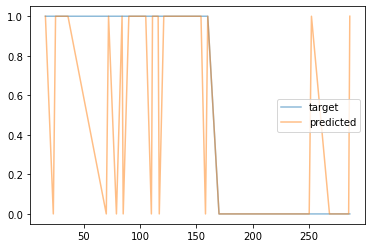

In [37]:
df_test[["target","predicted"]].plot(alpha=0.5);

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, test_set["predicted"])

array([[26,  2],
       [ 7, 25]], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, test_set["predicted"])    

0.85

In [40]:
forest_pred = forest.predict(X.iloc[:,:])
forest_mse = mean_squared_error(Y, forest_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.3872983346207417

In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest, x, y, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [0.48989795 0.4472136  0.34641016 0.35355339 0.45643546 0.45643546
 0.35355339 0.57735027 0.35355339 0.40824829]
Mean: 0.4242651366178956
Standard deviation: 0.07187322531558642


In [42]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression().fit(x,y)
log_reg.predict(X)
test_set["predicted"] = log_reg.predict(X)
test_set.head()


C:\Users\rober\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-42-5efd1f7bc4d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["predicted"] = log_reg.predict(X)


,age,female,male,typical angina,atypical angina,non-anginal pain,asymptomatic,trestbps,chol,fbs,...,oldpeak,upsloping,flat,downsloping,ca,thal_normal,fixed defect,reversable defect,target,predicted
121,59,0.0,1.0,1.0,0.0,0.0,0.0,138,271,0,...,0.0,0.0,0.0,1.0,0,0.0,1.0,0.0,1,1
269,56,0.0,1.0,1.0,0.0,0.0,0.0,130,283,1,...,1.6,1.0,0.0,0.0,0,0.0,0.0,1.0,0,0
144,76,1.0,0.0,0.0,0.0,1.0,0.0,140,197,0,...,1.1,0.0,1.0,0.0,0,0.0,1.0,0.0,1,1
174,60,0.0,1.0,1.0,0.0,0.0,0.0,130,206,0,...,2.4,0.0,1.0,0.0,2,0.0,0.0,1.0,0,0
243,57,0.0,1.0,1.0,0.0,0.0,0.0,152,274,0,...,1.2,0.0,1.0,0.0,1,0.0,0.0,1.0,0,0


In [43]:
df_test = pd.DataFrame(test_set)
df_test.sort_index(inplace=True)

<AxesSubplot:>

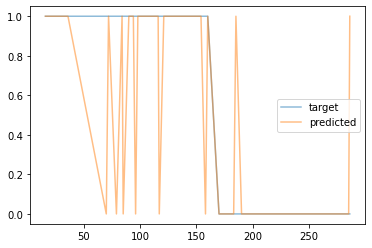

In [44]:
df_test[["target","predicted"]].plot(alpha=0.5)

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, test_set["predicted"])

array([[26,  2],
       [ 6, 26]], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, test_set["predicted"])    

0.8666666666666667

In [47]:
log_pred = log_reg.predict(X.iloc[:,:])
log_mse = mean_squared_error(Y, log_pred)
log_rmse = np.sqrt(log_mse)
log_rmse

0.3651483716701107

In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, x, y, scoring="neg_mean_squared_error", cv=10)
log_rmse_scores = np.sqrt(-scores)
display_scores(log_rmse_scores)

C:\Users\rober\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Scores: [0.4472136  0.34641016 0.28284271 0.28867513 0.40824829 0.45643546
 0.40824829 0.54006172 0.5        0.28867513]
Mean: 0.3966810509060664
Standard deviation: 0.08743079464387096


C:\Users\rober\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rober\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [49]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x, y)
Y_model = model.predict(X)
test_set["predicted"] = model.predict(X)
test_set.head()

<ipython-input-49-2bbd67e341d8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["predicted"] = model.predict(X)


,age,female,male,typical angina,atypical angina,non-anginal pain,asymptomatic,trestbps,chol,fbs,...,oldpeak,upsloping,flat,downsloping,ca,thal_normal,fixed defect,reversable defect,target,predicted
121,59,0.0,1.0,1.0,0.0,0.0,0.0,138,271,0,...,0.0,0.0,0.0,1.0,0,0.0,1.0,0.0,1,1
269,56,0.0,1.0,1.0,0.0,0.0,0.0,130,283,1,...,1.6,1.0,0.0,0.0,0,0.0,0.0,1.0,0,0
144,76,1.0,0.0,0.0,0.0,1.0,0.0,140,197,0,...,1.1,0.0,1.0,0.0,0,0.0,1.0,0.0,1,1
174,60,0.0,1.0,1.0,0.0,0.0,0.0,130,206,0,...,2.4,0.0,1.0,0.0,2,0.0,0.0,1.0,0,0
243,57,0.0,1.0,1.0,0.0,0.0,0.0,152,274,0,...,1.2,0.0,1.0,0.0,1,0.0,0.0,1.0,0,0


In [50]:
df_test = pd.DataFrame(test_set)
df_test.sort_index(inplace=True)

<AxesSubplot:>

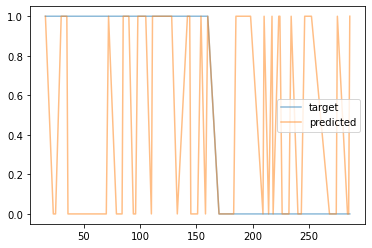

In [51]:
df_test[["target","predicted"]].plot(alpha=0.5)

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, test_set["predicted"])

array([[15, 13],
       [14, 18]], dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, Y_model)

0.55

In [54]:
from sklearn.metrics import mean_squared_error
knn_pred = model.predict(X.iloc[:,:])
knn_mse = mean_squared_error(Y, knn_pred)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

0.6708203932499369

In [55]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=10)
knn_rmse_scores = np.sqrt(-scores)
display_scores(knn_rmse_scores)

Scores: [0.72111026 0.72111026 0.66332496 0.64549722 0.54006172 0.6770032
 0.5        0.70710678 0.64549722 0.54006172]
Mean: 0.6360773348300002
Standard deviation: 0.07684805863236745


In [56]:
from sklearn import svm
SVM = svm.LinearSVC()
SVM.fit(x,y)
SVM.predict(X)
test_set["predicted"] = SVM.predict(X)
test_set.head()

C:\Users\rober\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
<ipython-input-56-0aaba105a26d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["predicted"] = SVM.predict(X)


,age,female,male,typical angina,atypical angina,non-anginal pain,asymptomatic,trestbps,chol,fbs,...,oldpeak,upsloping,flat,downsloping,ca,thal_normal,fixed defect,reversable defect,target,predicted
121,59,0.0,1.0,1.0,0.0,0.0,0.0,138,271,0,...,0.0,0.0,0.0,1.0,0,0.0,1.0,0.0,1,1
269,56,0.0,1.0,1.0,0.0,0.0,0.0,130,283,1,...,1.6,1.0,0.0,0.0,0,0.0,0.0,1.0,0,0
144,76,1.0,0.0,0.0,0.0,1.0,0.0,140,197,0,...,1.1,0.0,1.0,0.0,0,0.0,1.0,0.0,1,1
174,60,0.0,1.0,1.0,0.0,0.0,0.0,130,206,0,...,2.4,0.0,1.0,0.0,2,0.0,0.0,1.0,0,0
243,57,0.0,1.0,1.0,0.0,0.0,0.0,152,274,0,...,1.2,0.0,1.0,0.0,1,0.0,0.0,1.0,0,0


In [57]:
df_test = pd.DataFrame(test_set)
df_test.sort_index(inplace=True)

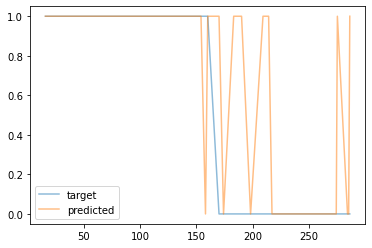

In [58]:
df_test[["target","predicted"]].plot(alpha=0.5);

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, test_set["predicted"])

array([[19,  9],
       [ 1, 31]], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, test_set["predicted"])    

0.8333333333333334

In [61]:
SVM_pred = SVM.predict(X.iloc[:,:])
SVM_mse = mean_squared_error(Y, SVM_pred)
SVM_rmse = np.sqrt(SVM_mse)
SVM_rmse

0.408248290463863

In [62]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(SVM, x, y, scoring="neg_mean_squared_error", cv=10)
SVM_rmse_scores = np.sqrt(-scores)
display_scores(SVM_rmse_scores)

C:\Users\rober\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rober\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rober\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rober\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rober\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Scores: [0.52915026 0.52915026 0.48989795 0.28867513 0.57735027 0.5
 0.61237244 0.61237244 0.54006172 0.54006172]
Mean: 0.5219092197893141
Standard deviation: 0.08723970597674677


C:\Users\rober\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rober\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
